In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

## Import du fichier

In [72]:
filename = "Demandeurs d’emploi inscrits en fin de mois à Pôle emploi par Sexe_Âge - Département _ La Réunion 97.csv"
data = pd.read_csv(filename,sep = ";",
                   skipfooter = 1,
                   engine = "python",
                   skiprows=3)

data.tail()

,Mois,Hommes/Moins de 25 ans,Hommes/De 25 à 49 ans,Hommes/50 ans ou plus,Total Hommes,Femmes/Moins de 25 ans,Femmes/De 25 à 49 ans,Femmes/50 ans ou plus,Total Femmes,Total
320,Septembre 2022,12 190,47 030,24 830,84 050,13 080,53 410,26 460,92 950,176 990
321,Octobre 2022,12 150,46 730,24 770,83 650,13 040,53 160,26 440,92 640,176 270
322,Novembre 2022,12 090,46 860,24 700,83 650,13 050,53 010,26 520,92 580,176 220
323,Décembre 2022,11 720,46 540,24 770,83 030,12 520,52 180,26 350,91 050,174 070
324,Janvier 2023,12 130,47 240,25 020,84 390,12 720,52 860,26 480,92 060,176 440


## Modifification du fichier 
Ecrire data pour pouvoir générer un fichier propre prêt à être utiliser


In [83]:
data["Mois"] = pd.Series(pd.date_range(start = "01-01-1996", end="01-01-2023",freq="M"))
all_but_months = data.columns != "Mois"

data.iloc[:,all_but_months] = data.iloc[:,all_but_months].applymap(lambda x : x.replace(" ","")).astype("int64")
data.head(3)

/tmp/ipykernel_10781/1874571372.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,all_but_months] = data.iloc[:,all_but_months].applymap(lambda x : x.replace(" ","")).astype("int64")


,Mois,Hommes/Moins de 25 ans,Hommes/De 25 à 49 ans,Hommes/50 ans ou plus,Total Hommes,Femmes/Moins de 25 ans,Femmes/De 25 à 49 ans,Femmes/50 ans ou plus,Total Femmes,Total
0,1996-01-31,11310,35730,3560,50600,13280,35560,2700,51540,102140
1,1996-02-29,11540,36350,3620,51510,13460,35940,2760,52160,103670
2,1996-03-31,11650,36370,3630,51650,13300,36180,2740,52220,103870


## Visualisations 

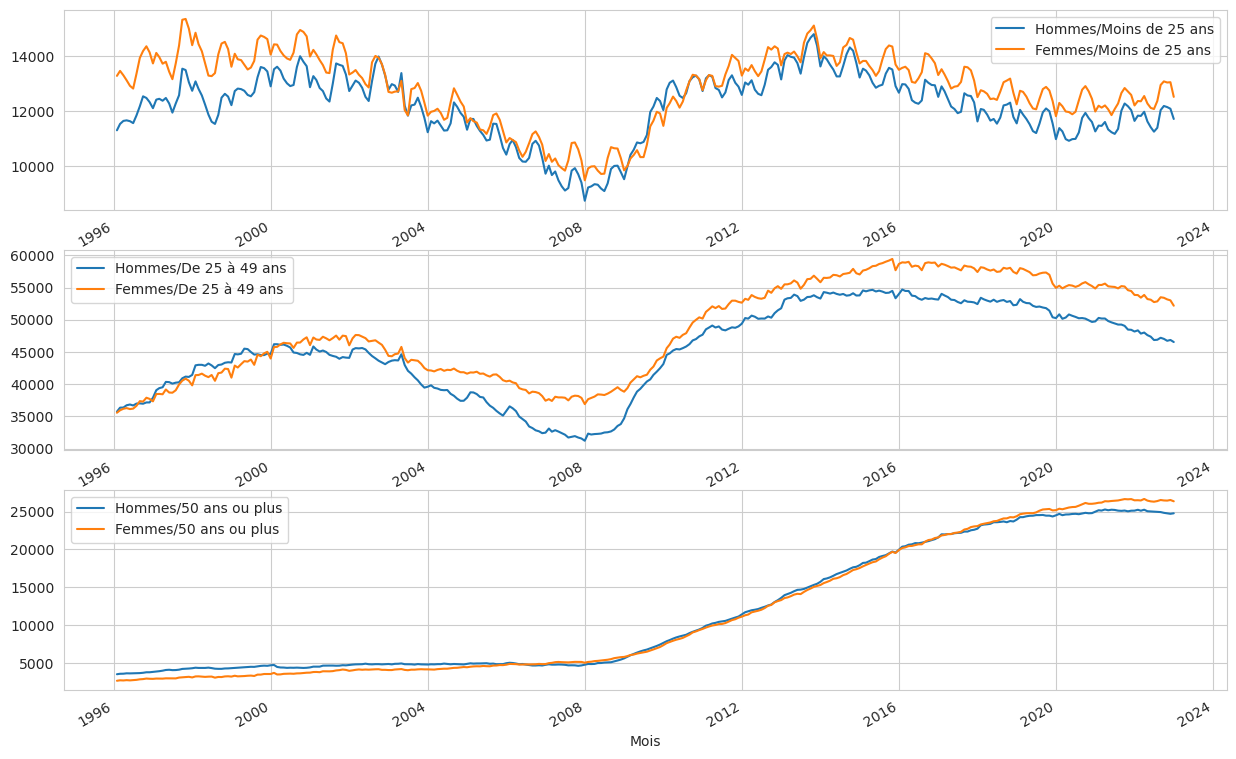

In [137]:
sns.set_style("whitegrid")
fig , (ax1,ax2,ax3) = plt.subplots(3, figsize=(15, 10))

# Comparaison homme femme de même âge 
data.loc[:,["Mois","Hommes/Moins de 25 ans","Femmes/Moins de 25 ans"]].plot(x = "Mois", ax = ax1)

data.loc[:,["Mois","Hommes/De 25 à 49 ans","Femmes/De 25 à 49 ans"]].plot(x = "Mois", ax = ax2)

data.loc[:,["Mois","Hommes/50 ans ou plus","Femmes/50 ans ou plus"]].plot(x = "Mois", ax = ax3)

plt.show()
